<a href="https://colab.research.google.com/github/MichaelArgs/Tugas-PenambanganData/blob/main/Bengkod_UAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [15]:
file_path = 'water_potability.csv'
water_data = pd.read_csv(file_path)

water_data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [16]:
# Informasi dataset
dataset_info = {
    "Jumlah Baris": len(water_data),
    "Tipe Data": water_data.dtypes.to_dict(),
    "Jumlah Nilai Unik": water_data.nunique().to_dict()
}

# Menampilkan informasi dataset
print("Jumlah Baris:", dataset_info["Jumlah Baris"])
print("\nTipe Data Tiap Kolom:")
for col, dtype in dataset_info["Tipe Data"].items():
    print(f"  {col}: {dtype}")

print("\nJumlah Nilai Unik Tiap Kolom:")
for col, unique_vals in dataset_info["Jumlah Nilai Unik"].items():
    print(f"  {col}: {unique_vals}")


Jumlah Baris: 3276

Tipe Data Tiap Kolom:
  ph: float64
  Hardness: float64
  Solids: float64
  Chloramines: float64
  Sulfate: float64
  Conductivity: float64
  Organic_carbon: float64
  Trihalomethanes: float64
  Turbidity: float64
  Potability: int64

Jumlah Nilai Unik Tiap Kolom:
  ph: 2785
  Hardness: 3276
  Solids: 3276
  Chloramines: 3276
  Sulfate: 2495
  Conductivity: 3276
  Organic_carbon: 3276
  Trihalomethanes: 3114
  Turbidity: 3276
  Potability: 2



Cek Missing Values:
ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

Missing Values Setelah Imputasi:
ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64


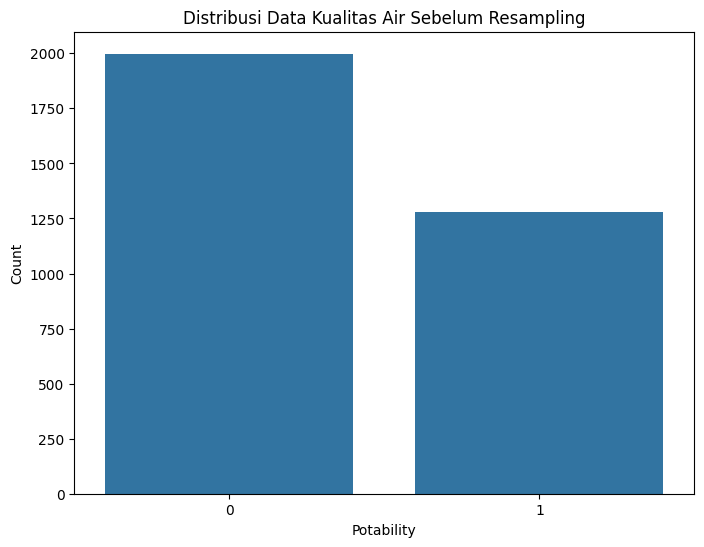

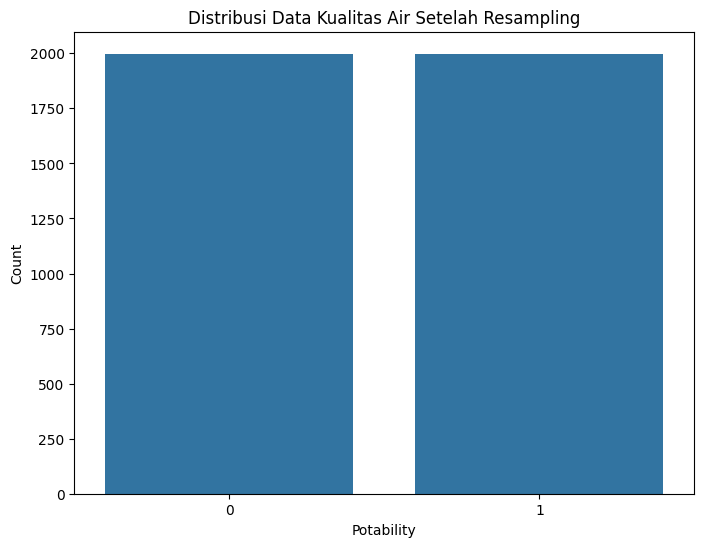

In [17]:
# Cek missing values
print("\nCek Missing Values:")
missing_values = water_data.isnull().sum()
print(missing_values)

# Imputasi missing values dengan rata-rata
water_data.fillna(water_data.mean(), inplace=True)
print("\nMissing Values Setelah Imputasi:")
print(water_data.isnull().sum())

# Visualisasi distribusi data kualitas air sebelum resampling
plt.figure(figsize=(8, 6))
sns.countplot(x='Potability', data=water_data)
plt.title('Distribusi Data Kualitas Air Sebelum Resampling')
plt.xlabel('Potability')
plt.ylabel('Count')
plt.show()

# Resampling data
from sklearn.utils import resample

data_majority = water_data[water_data['Potability'] == 0]
data_minority = water_data[water_data['Potability'] == 1]

data_minority_upsampled = resample(data_minority,
                                   replace=True,
                                   n_samples=len(data_majority),
                                   random_state=42)

water_data_resampled = pd.concat([data_majority, data_minority_upsampled])

# Visualisasi distribusi data kualitas air setelah resampling
plt.figure(figsize=(8, 6))
sns.countplot(x='Potability', data=water_data_resampled)
plt.title('Distribusi Data Kualitas Air Setelah Resampling')
plt.xlabel('Potability')
plt.ylabel('Count')
plt.show()


In [18]:
# Menentukan fitur dan target
features = ["ph", "Hardness", "Solids", "Chloramines", "Sulfate", "Conductivity", "Organic_carbon", "Trihalomethanes", "Turbidity"]
target = "Potability"

X = water_data_resampled[features]
y = water_data_resampled[target]

print("\nFitur yang digunakan:")
print(features)
print("\nTarget:")
print(target)



Fitur yang digunakan:
['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']

Target:
Potability


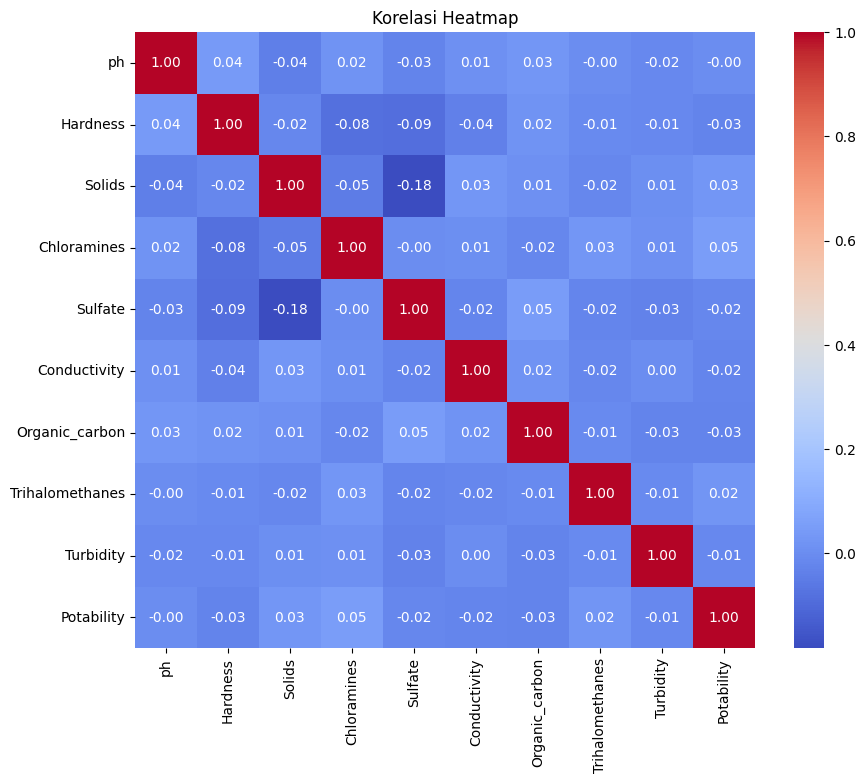

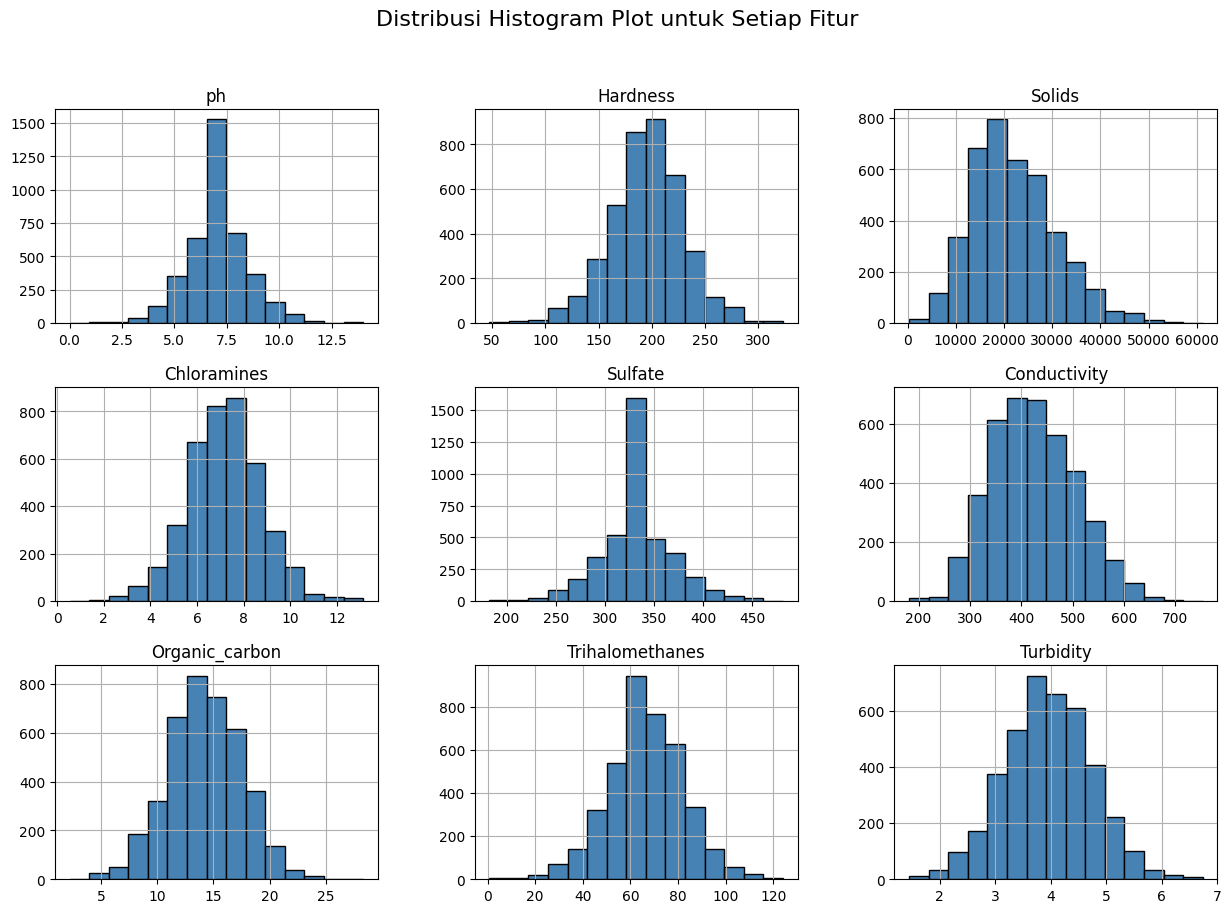

In [19]:
# Visualisasi Korelasi Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(water_data_resampled.corr(), annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Korelasi Heatmap")
plt.show()

# Visualisasi Distribusi Histogram Plot
water_data_resampled[features].hist(bins=15, figsize=(15, 10), color="steelblue", edgecolor="black")
plt.suptitle("Distribusi Histogram Plot untuk Setiap Fitur", fontsize=16)
plt.show()


KNN Accuracy: 0.5888240200166805


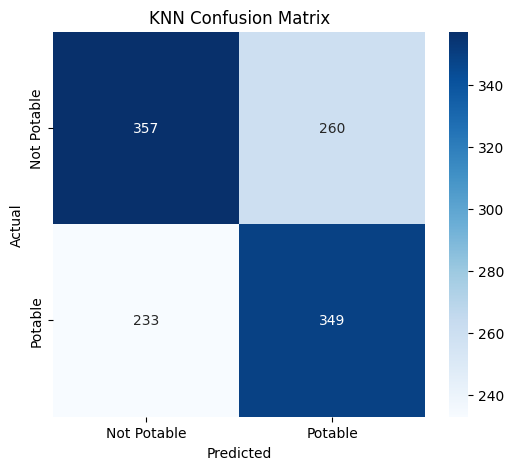

Gradient Boosting Accuracy: 0.6580483736447039


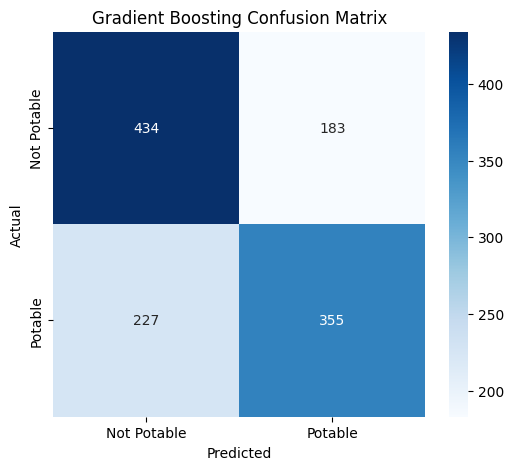

Naive Bayes Accuracy: 0.5704753961634695


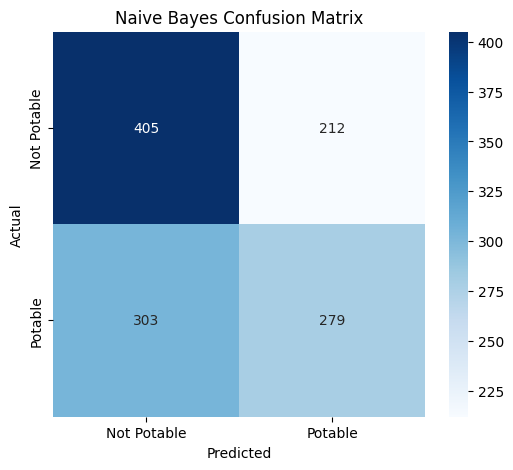

In [20]:
# Split data menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Model 1: K-Nearest Neighbors (KNN)
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))

# Confusion Matrix untuk KNN
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Potable', 'Potable'], yticklabels=['Not Potable', 'Potable'])
plt.title("KNN Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Model 2: Gradient Boosting
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)
print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb))

# Confusion Matrix untuk Gradient Boosting
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_gb, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Potable', 'Potable'], yticklabels=['Not Potable', 'Potable'])
plt.title("Gradient Boosting Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Model 3: Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))

# Confusion Matrix untuk Naive Bayes
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_nb, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Potable', 'Potable'], yticklabels=['Not Potable', 'Potable'])
plt.title("Naive Bayes Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [21]:
# Evaluasi Sebelum Normalisasi
print("Evaluasi Sebelum Normalisasi:")
# KNN
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"KNN Accuracy: {accuracy_knn:.2f}")

# Gradient Boosting
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print(f"Gradient Boosting Accuracy: {accuracy_gb:.2f}")

# Naive Bayes
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f"Naive Bayes Accuracy: {accuracy_nb:.2f}")

# Normalisasi Data
scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

print("\nEvaluasi Setelah Normalisasi:")
# KNN dengan data normalisasi
knn_model.fit(X_train_normalized, y_train)
y_pred_knn_normalized = knn_model.predict(X_test_normalized)
accuracy_knn_normalized = accuracy_score(y_test, y_pred_knn_normalized)
print(f"KNN Accuracy (Normalized): {accuracy_knn_normalized:.2f}")

# Gradient Boosting (tidak terpengaruh oleh normalisasi)
gb_model.fit(X_train_normalized, y_train)
y_pred_gb_normalized = gb_model.predict(X_test_normalized)
accuracy_gb_normalized = accuracy_score(y_test, y_pred_gb_normalized)
print(f"Gradient Boosting Accuracy (Normalized): {accuracy_gb_normalized:.2f}")

# Naive Bayes dengan data normalisasi
nb_model.fit(X_train_normalized, y_train)
y_pred_nb_normalized = nb_model.predict(X_test_normalized)
accuracy_nb_normalized = accuracy_score(y_test, y_pred_nb_normalized)
print(f"Naive Bayes Accuracy (Normalized): {accuracy_nb_normalized:.2f}")

Evaluasi Sebelum Normalisasi:
KNN Accuracy: 0.59
Gradient Boosting Accuracy: 0.66
Naive Bayes Accuracy: 0.57

Evaluasi Setelah Normalisasi:
KNN Accuracy (Normalized): 0.63
Gradient Boosting Accuracy (Normalized): 0.66
Naive Bayes Accuracy (Normalized): 0.57
